# **Зачет по МФК "Математическая статистика и анализ данных"**
`Рукавица Артём, ВМК, группа 101`

`Я выполнил задания 1-10.`


**Импорты библиотек**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import seaborn as sns
from itertools import combinations
from scipy.stats import expon

**ЗАДАНИЕ 1.**

В каких колонках есть пропущенные значения? Сколько строк, в которых есть хотя бы одно пропущенное значение? Есть ли какая-то особенность в тех рейсах, в которых есть пропущенные значения? Удалите строки, в которых есть хотя бы одно пропущенное значение из дальнейшего анализа.


In [ ]:
df = pd.read_csv('flights_NY.csv')
df.columns[df.isna().any()].tolist()


['dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'tailnum', 'air_time']

Приведенная выше ячейка выводит колонки, в которых есть пропущенные значения:
`['dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'tailnum', 'air_time']`

In [ ]:
len(df[df.isna().any(axis=1)])

9430

9430 -- количество строк, в которых есть хотя бы одно пропущенное значение.

Изучим эти строки.


In [ ]:
df[df.isna().any(axis=1)]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
471,2013,1,1,1525.0,-5.0,1934.0,NaN,MQ,N719MQ,4525,LGA,XNA,NaN,1147
477,2013,1,1,1528.0,29.0,2002.0,NaN,EV,N17108,3806,EWR,STL,NaN,872
615,2013,1,1,1740.0,-5.0,2158.0,NaN,MQ,N739MQ,4413,LGA,XNA,NaN,1147
643,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425
725,2013,1,1,1939.0,59.0,29.0,NaN,9E,N905XJ,3325,JFK,DFW,NaN,1391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198
336773,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419


In [ ]:
to_del = df.isna().any(axis=1)
print('Количество строк в dep_time: ', df[to_del]['dep_time'].isna().sum())
print('Количество строк в dep_delay: ', df[to_del]['dep_delay'].isna().sum())
print('Количество строк в arr_time: ', df[to_del]['arr_time'].isna().sum())
print('Количество строк в arr_delay: ', df[to_del]['arr_delay'].isna().sum())
print('Количество строк в tailnum: ', df[to_del]['tailnum'].isna().sum())
print('Количество строк в air_time: ', df[to_del]['air_time'].isna().sum())

Количество строк в dep_time:  8255
Количество строк в dep_delay:  8255
Количество строк в arr_time:  8713
Количество строк в arr_delay:  9430
Количество строк в tailnum:  2512
Количество строк в air_time:  9430


Заметим, что во всех строк, в которых есть хотя бы одно пропущенное значение, отсутствуют значения в столбцах `arr_delay` и `air_time`.

Из этого можем выдвинуть следующее предположение: рейсы, в которых отсутствует хотя бы одно значение, скорее всего, были отменены.

In [ ]:
df = df.dropna() # удалили пустые строки

**ЗАДАНИЕ 2**

Постройте в одних осях нормированные гистограммы времени задержки вылета и прилета. Ограничьте диапазон построения гистограмм, чтобы избавиться от выбросов, и опишите характер выбросов (количество и значения). Есть ли другие особенности в полученных распределениях?


(array([3.11999e+05, 1.34510e+04, 1.65700e+03, 1.79000e+02, 2.30000e+01,
        1.10000e+01, 1.70000e+01, 6.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([ -43. ,   91.4,  225.8,  360.2,  494.6,  629. ,  763.4,  897.8,
        1032.2, 1166.6, 1301. ]),
 <BarContainer object of 10 artists>)

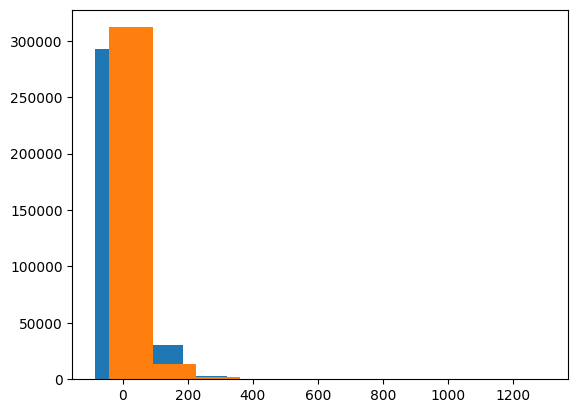

In [ ]:
plt.hist(x=df['arr_delay'])
plt.hist(x=df['dep_delay'])

Из этого графика трудно что-либо выяснить ввиду наличия выбросов (распределения сдвинуты вправо). Построим boxplot для `arr_delay` и `dep_delay` для определения выбросов.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f387f4365c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f387f436b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f387f436440>],
 'medians': [<matplotlib.lines.Line2D at 0x7f387f437040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f387f4372e0>],
 'means': []}

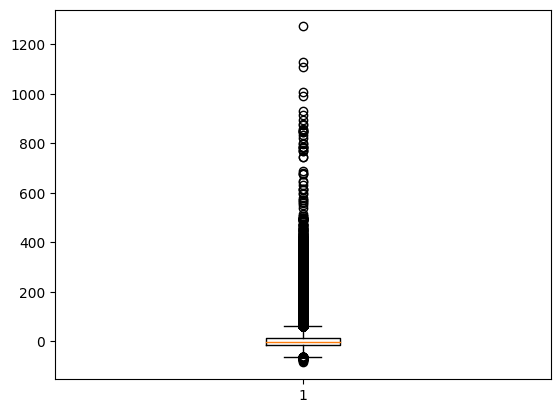

In [ ]:
plt.boxplot(x=df['arr_delay'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f387f4c1870>,
 'caps': [<matplotlib.lines.Line2D at 0x7f387f4c1db0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f387f4c15d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f387f4c22f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f387f4c2590>],
 'means': []}

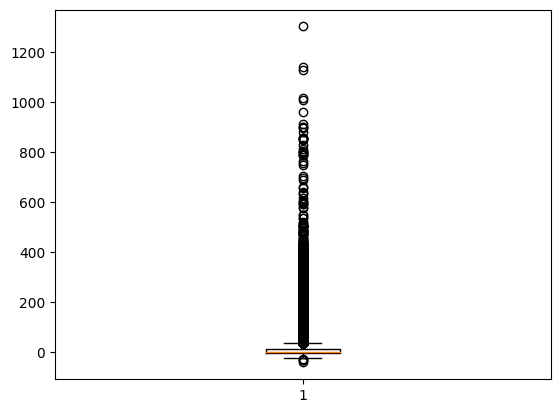

In [ ]:
plt.boxplot(x=df['dep_delay'])

В двух графиках выше есть множество черных кружков -- это и есть выбросы в данных. Выделим данные без них, используя квантили 0.25 и 0.75, построим график с нормировкой столбцов.

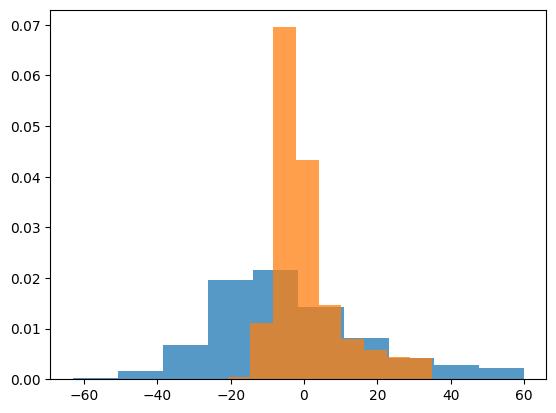

In [ ]:
def my_filter(column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1
  Lower_Fence = Q1 - (1.5 * IQR)
  Upper_Fence = Q3 + (1.5 * IQR)
  plt.hist(x=df[(df[column_name]<=Upper_Fence) & (Lower_Fence<=df[column_name])][column_name], density=True, alpha=0.75)
  return Lower_Fence, Upper_Fence



LFa, UFa = my_filter('arr_delay')
LFd, UFd = my_filter('dep_delay')
# Синим - задержки вылета, оранжевым -- задержки отправления

In [ ]:
column_name = 'arr_delay'
df[(df[column_name]>UFa) | (LFa>df[column_name])][column_name].describe()

count    27880.000000
mean       120.556241
std         67.450197
min        -86.000000
25%         77.000000
50%        100.000000
75%        143.000000
max       1272.000000
Name: arr_delay, dtype: float64

**Изучение выбросов для столбца `arr_delay`.**

1.   Количество выбросов: 27880
2.   Среднее значение: 120,5 (задержка примерно на два часа)
3.   Минимальное значение: -86 (рейс вылетел на 86 минут ранее)
4.   Максимальное значение: 1272 (рейс вылетел на 1272 минуты позже)

Других особенностей выявлено не было.


In [ ]:
column_name = 'dep_delay'
df[(df[column_name]>UFd) | (LFd>df[column_name])][column_name].describe()

count    42857.000000
mean        92.996500
std         64.847403
min        -43.000000
25%         50.000000
50%         72.000000
75%        114.000000
max       1301.000000
Name: dep_delay, dtype: float64

**Изучение выбросов для столбца `arr_delay`.**

1.   Количество выбросов: 42857
2.   Среднее значение: 93 (задержка примерно на полтора часа)
3.   Минимальное значение: -43 (рейс прилетел на 43 минут ранее)
4.   Максимальное значение: 1301 (рейс прилетел на 1301 минуту позже)

Других особенностей выявлено не было.

**ЗАДАНИЕ 3**

Оцените среднее значение, медиану и величину стандартного отклонения для времени задержки вылета и времени задержки прилета.


In [ ]:
df[['arr_delay', 'dep_delay']].describe()

,arr_delay,dep_delay
count,327346.000000,327346.000000
mean,6.895377,12.555156
std,44.633292,40.065688
min,-86.000000,-43.000000
25%,-17.000000,-5.000000
50%,-5.000000,-2.000000
75%,14.000000,11.000000
max,1272.000000,1301.000000


Для `arr_delay`:


1.   Среднее значение (mean) == 6.895377
2.   Медиана (перцентиль 50% в табличке выше) == -5
3.   Величина стандартного отклонения (std) == 44.633292


Для `dep_delay`:


1.   Среднее значение (mean) == 12.555156
2.   Медиана (перцентиль 50% в табличке выше) == -2
3.   Величина стандартного отклонения (std) == 40.065688



**ЗАДАНИЕ 4**


Отсортируйте авиакомпании по величине средней задержки вылета и приведите среднюю задержку вылета вместе с 95%-доверительным интервалом по каждой авиакомпании. Результат представьте в виде графика.


In [ ]:
def function(carrier):
  return df[df['carrier']==carrier]['dep_delay'].mean()

# df['new'] = df['carrier'].apply(function)
carriers = {}
for carrier in df['carrier'].unique():
  carriers[function(carrier)] =carrier
for key in sorted(carriers):
    print(carriers[key], key)

US 3.74469265291715
HA 4.900584795321637
AS 5.830747531734838
AA 8.569130121764172
DL 9.223949809056192
MQ 10.445380836362183
UA 12.016908379772248
OO 12.586206896551724
VX 12.756645817044566
B6 12.967547965734797
9E 16.439574418873597
WN 17.66165725672534
FL 18.605984251968504
YV 18.89889705882353
EV 19.838929326132895
F9 20.201174743024964


Приведенный код выше отсортировал авиакомпании по средней величине задержки. Вот этот список по возрастанию:

`US, HA, AS, AA, DL, MQ, UA, OO, VX, B6, 9E, WN, FL, YV, EV, F9`


<ipython-input-47-c21a3cd1e9d2>:7: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  interval = st.norm.interval(alpha=0.95, loc=np.mean(df1), scale=st.sem(df1)) # высчитываем доверительный интервал
<ipython-input-47-c21a3cd1e9d2>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower, upper), (y, y), 'ro-', color='orange')


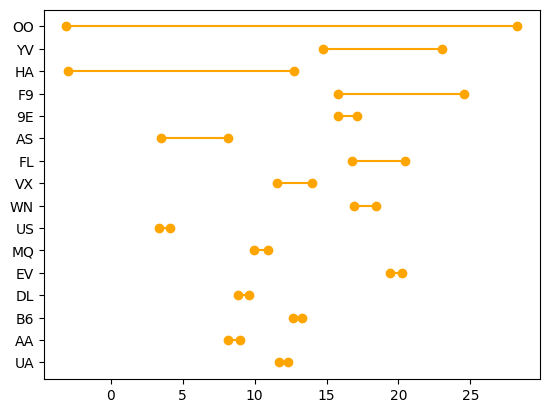

In [ ]:
data_dict = {}
data_dict['category'] = []
data_dict['lower'] = []
data_dict['upper'] = []
for carrier in carriers.values():
  df1 = df[df['carrier']==carrier]['dep_delay']
  interval = st.norm.interval(alpha=0.95, loc=np.mean(df1), scale=st.sem(df1)) # высчитываем доверительный интервал
  data_dict['lower'].append(interval[0])
  data_dict['upper'].append(interval[1])
  data_dict['category'].append(carrier)

dataset = pd.DataFrame(data_dict)
for lower,upper,y in zip(dataset['lower'], dataset['upper'], range(len(dataset))):
    plt.plot((lower, upper), (y, y), 'ro-', color='orange')
    plt.yticks(range(len(dataset)), list(dataset['category']))

**ЗАДАНИЕ 5**

Значимо ли различие в среднем времени задержки вылета для авиакомпаний American Airlines (AA) и Delta Airlines (DL)? На каком уровне значимости можно отвергнуть гипотезу о равенстве средних?


In [ ]:
dfAA = df[df['carrier']=='AA']['dep_delay']
dfDL = df[df['carrier']=='DL']['dep_delay']
stat, p_value = ttest_ind(dfAA, dfDL)
print(p_value)

0.01945036352051051


Воспользуемся t-test'ом, он вывел `p-value = 0.01945036352051051`

На уровне значимости `p = 0.05` > p_value можем отвергать гипотезу. Различие значимо.


**ЗАДАНИЕ 6**

Сравните между собой аэропорты вылета (JFK, LGA, EWR) с точки зрения статистики задержек вылетов. Являются ли различия статистически значимыми?


In [ ]:
# Выборки
dfJFK = df[df['origin']=='JFK']['dep_delay']
dfLGA = df[df['origin']=='LGA']['dep_delay']
dfEWR = df[df['origin']=='EWR']['dep_delay']


# Выполняем t-тест для каждой пары
stat, p_value = ttest_ind(dfJFK, dfLGA)
print(f"p-value: {p_value} для JFK-LGA")

stat, p_value = ttest_ind(dfJFK, dfEWR)
print(f"p-value: {p_value} для JFK-EWR")

stat, p_value = ttest_ind(dfLGA, dfEWR)
print(f"p-value: {p_value} для LGA-EWR")

p-value: 4.9582451486320366e-24 для JFK-LGA
p-value: 3.984431388114213e-70 для JFK-EWR
p-value: 1.9011910565531667e-161 для LGA-EWR


Все p_value по парам на порядки ниже порогового значения `p = 0.05`, поэтому различия являются статистически значимыми.

**ЗАДАНИЕ 7**

Каким распределением можно описать распределение времени задержки вылета в диапазоне, где время задержки вылета > 0? Предложите общий вид распределения и оцените его параметры. На одном рисунке изобразите гистограмму и график плотности аппроксимирующего распределения.


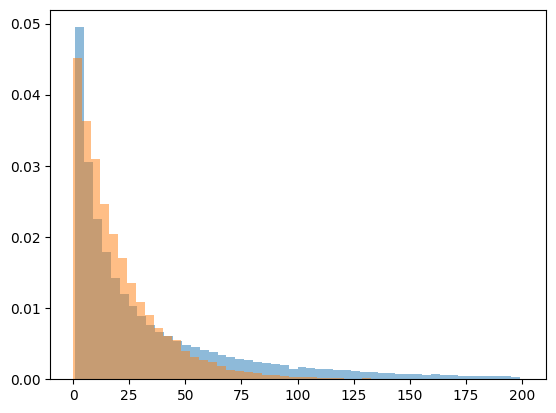

In [ ]:
x = expon.rvs(scale=20, size=25000)
plt.hist(x=df[(df['dep_delay'] > 0) & (df['dep_delay'] < 200)]['dep_delay'], density=True, alpha=0.5, bins=50)
plt.hist(x, density=True, alpha=0.5, bins=50)
plt.show()

На графике выше синим цветом изображено нормированное распределение времени задержки рейса, оранжевым -- экспоненциальное распределение.
В качестве аппроксимирующего распределения взято экспоненциальное с параметром scale = 20.

**ЗАДАНИЕ 8**

Для тех рейсов, для которых задержка вылета > 0, постройте в одних осях графики числа рейсов в месяц и среднего времени задержки в месяц. Найдите коэффициент корреляции между полученными значениями. Постройте точечную диаграмму (scatterplot), показывающую зависимость между полученными значениями (по оси Х отложите число рейсов в месяц). Нанесите на график линию регрессии. Выпишите уравнение регрессии.

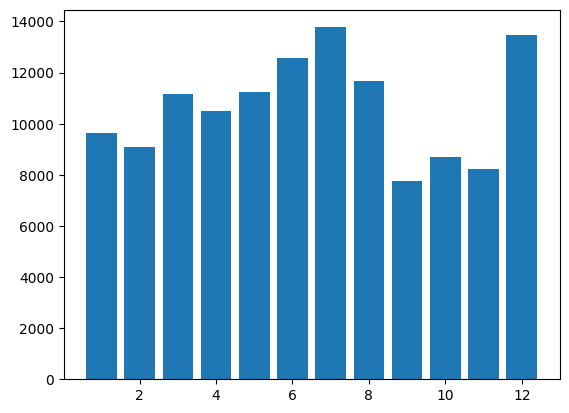

In [ ]:
counts, means = [], []
for i in range(1, 13):
  filtered = df_copy[df_copy['month']==i]
  counts.append(len(filtered))
  means.append(filtered['dep_delay'].mean())

plt.bar(range(1, 13), counts)
plt.show()

График выше -- график числа рейсов в месяц.

<BarContainer object of 12 artists>

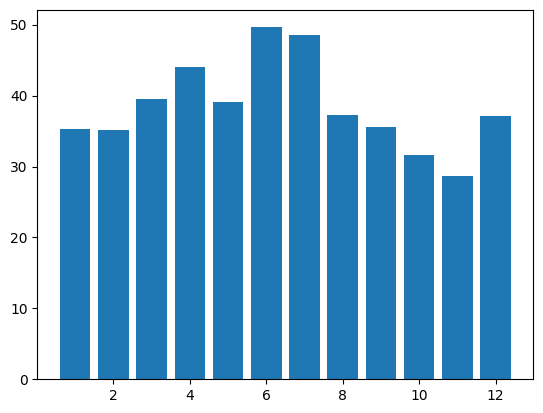

In [ ]:
plt.bar(range(1, 13), means)

График выше -- график средней задержки рейсов в месяц.

Теперь найдем коэффициент корреляции.

In [ ]:
corr, _ = pearsonr(counts, means)
corr

0.7288370677699055

Коэффициент корреляции ≈ 0.729. Построим график зависимости величины средней задержки от числа рейсов, а также вычислим уравнение регрессии.

y = 14.206 + 0.002x


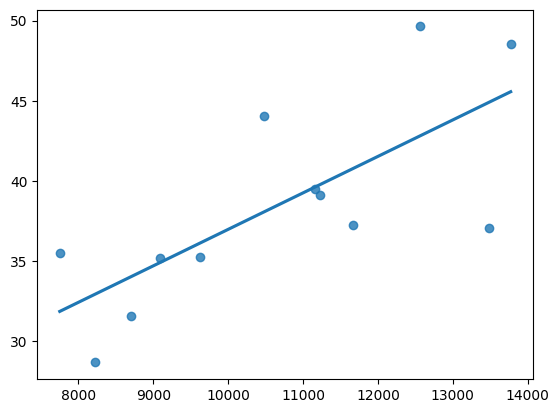

In [ ]:
p = sns.regplot(x=counts, y=means, ci=None)
slope, intercept, r, p, sterr = st.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
print('y = ' + str(round(intercept, 3)) + ' + ' + str(round(slope, 3)) + 'x')

**ЗАДАНИЕ 9**

Постройте график среднего времени задержки в зависимости от часа вылета. На отдельном графике постройте долю рейсов, для которых задержка > 0, в зависимости от часа вылета. Опишите словами наблюдаемую картину.

Для начала заметим, что задержек в четыре часа утра в принципе нет:


In [ ]:
df_copy['hour'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24,  1,  2,  3])

График среднего времени задержки в зависимости от часа вылета.

<BarContainer object of 24 artists>

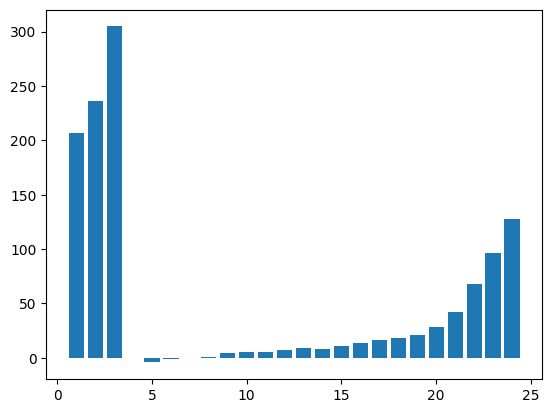

In [ ]:
df['hour'] = df['dep_time'].apply(lambda x: int(x // 100)).replace({0: 24})
means_departure = [df[df['hour']==hour]['dep_delay'].mean() for hour in range(1, 25)]
means_departure[3] = 0.0

plt.bar(range(1, 25), means_departure)
#means_departure

<BarContainer object of 24 artists>

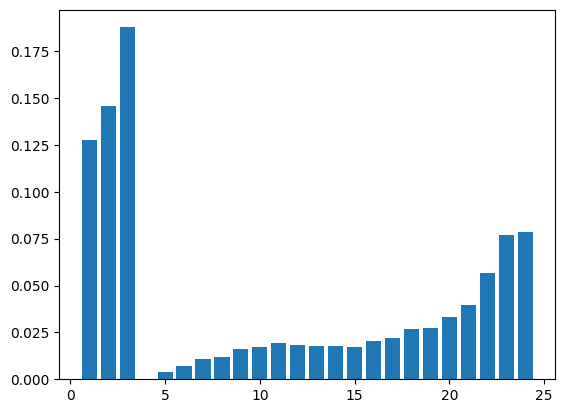

In [ ]:
means_departure_ = [df_copy[(df_copy['hour']==hour) & (df_copy['dep_delay'] > 0)]['dep_delay'].mean() for hour in range(1, 25)]
means_departure_[3] = 0.0
means_departure_normed = [x / sum(means_departure_) for x in means_departure_]
plt.bar(range(1, 25), means_departure_normed)

Заметим, что в ночное время (с 22 до 3) количество задержек максимально. Изучим среднее количество рейсов по часам при помощи графика ниже.  

<BarContainer object of 24 artists>

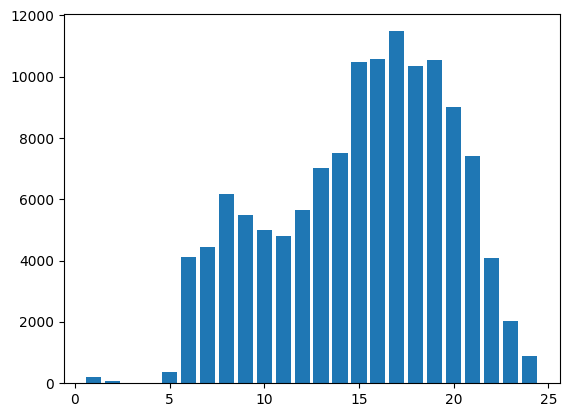

In [ ]:
counts_departure = [len(df_copy[df_copy['hour']==hour]['dep_delay']) for hour in range(1, 25)]
plt.bar(range(1, 25), counts_departure)

Начиная с 15 часов дня количество рейсов максимально. Возможно, аэропорты не справляются с нагрузкой, поэтому им приходится задерживать часть рейсов до ночи. Как раз к трём часам ночи поток разгружается и количество задержек уменьшается к нулю в четыре часа ночи, а начиная с пяти утра рейсы отправляются в полет даже чуть раньше назначенного времени.

**ЗАДАНИЕ 10**

Предложите способ разделить авиакомпании на пунктуальные и непунктуальные. Какие авиакомпании в какую группу попадают? Будут ли различаться группы в зависимости от дальности перелета?

OAG является ведущим глобальным поставщиком данных о путешествиях. Эта компания предлагает следующее понятие задержки рейса: задержкой рейса называется вылет или прилет более чем на 15 минут позднее запланированного. По доле таких задержек рейса и будем делить авиакомпании.


In [ ]:
def function(carrier):
  dff = df[df['carrier']==carrier]
  bad = dff[(dff['dep_delay'] > 15) | (dff['arr_delay'] > 15) ]

  return len(bad) / len(df[df['carrier']==carrier])


carriers = {}
for carrier in df['carrier'].unique():
  carriers[function(carrier)] =carrier
for key in sorted(carriers):
    # print(carriers[key], key, df[df['carrier']==carriers[key]]['distance'].mean())
    print(carriers[key], key)

HA 0.15497076023391812
AS 0.18899858956276447
US 0.19731733145075891
AA 0.22390208783297336
DL 0.22422258592471359
VX 0.2359265050820954
OO 0.2413793103448276
UA 0.27709321241909246
MQ 0.29795902064943885
B6 0.2997095228403856
9E 0.30334219960680003
WN 0.3182497509133178
YV 0.3492647058823529
EV 0.3516279251780543
FL 0.3700787401574803
F9 0.4199706314243759


Приведенный выше скрипт отсортировал авиакомпании по доле задержек. Выберем критическое значение `percent_of_delays = 0.25`. Таким образом, если процент задержек у авиакомпании меньше `percent_of_delays`, то счиатем авиакомпанию пунктуальной; иначе -- непунктуальной.

Получилось следующее разделение авиакомпаний:


In [ ]:
punc = ['HA', 'AS', 'US', 'AA', 'DL', 'VX', 'OO']
not_punc = ['UA', 'MQ', 'B6', '9E', 'WN', 'YV', 'EV', 'FL', 'F9']

Теперь исследуем пунктуальность компаний на дальних расстояниях. Дальними расстояниями будем считать значение `distance > 500`.


In [ ]:
def function(carrier):
  dff = df[(df['carrier']==carrier) & (df['distance'] > 500)]
  bad = dff[(dff['dep_delay'] > 15) | (dff['arr_delay'] > 15) ]

  return len(bad) / len(dff)

carriers = {}
for carrier in df['carrier'].unique():
  carriers[function(carrier)] =carrier
for key in sorted(carriers):
    # print(carriers[key], key, df[df['carrier']==carriers[key]]['distance'].mean())
    print(carriers[key], key)

HA 0.15497076023391812
AS 0.18899858956276447
US 0.20124790463773515
DL 0.22440334519728367
AA 0.22523673776991382
VX 0.2359265050820954
UA 0.2790830291970803
YV 0.29844961240310075
MQ 0.3105765559373807
B6 0.3129027386226339
9E 0.3165394973070018
WN 0.32041540020263426
EV 0.3694685505271462
FL 0.37676810972996144
OO 0.4
F9 0.4199706314243759


При пороговом значении `percent_of_delays = 0.25` получается следующее разделение:

`punc     = ['HA', 'AS', 'US', 'DL', 'AA', 'VX']`

`not_punc = ['UA', 'YV', 'MQ', 'B6', '9E', 'WN', 'EV', 'FL', 'OO', 'F9']`

Заметим, что при расстояниях `distance > 500` авиакомпания OO перешла из списка пунктуальных авиакомпаний в список непунктуальных, исходя из чего мы делаем вывод, что группы *различаются в зависимости от дальности перелета.*